In [8]:
import numpy as np

X = [50, 74, 98, 122, 146, 170]
Y = [0.58, 1.08, 1.58, 2.08, 2.58, 3.08, 3.58, 4.08]
n = 100
table = np.array([
    [3, 3, 4, 6, 0, 0, 0, 0],
    [0, 5, 8, 9, 0, 0, 0, 0],
    [0, 0, 0, 13, 8, 9, 0, 0],
    [0, 0, 0, 0, 9, 2, 4, 0],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 5, 3]
], np.int32)


m_x = [sum(i) for i in table]
m_y = [0 for i in range(len(Y))]
for i in range(len(table)):
    for j in range(len(table[i])):
        m_y[j] += table[i][j]


In [9]:
from math import sqrt

sample_average_x = sum([m_x[i]*X[i] for i in range(len(m_x))])/n
sample_average_y = sum([m_y[j]*Y[j] for j in range(len(m_y))])/n


s_x = sqrt((1/(n-1))*(sum([m_x[i]*X[i]**2 for i in range(len(m_x))]
                          )-(1/n)*sum([m_x[i]*X[i] for i in range(len(m_x))])**2))
s_y = sqrt((1/(n-1))*(sum([m_y[j]*Y[j]**2 for j in range(len(m_y))]
                          )-(1/n)*sum([m_y[j]*Y[j] for j in range(len(m_y))])**2))

s_x_y = (1/(n-1))*(sum([sum([table[i][j]*X[i]*Y[j] for j in range(len(table[i]))]) for i in range(len(table))]
                       )-(1/n)*sum([m_x[i]*X[i] for i in range(len(m_x))])*sum([m_y[j]*Y[j] for j in range(len(m_y))]))

r_x_y = s_x_y/(s_x*s_y)

print("sample average y = {}".format(sample_average_y))
print("sample average x = {}".format(sample_average_x))
print("S_x = {}".format(s_x))
print("S_y = {}".format(s_y))
print("S_x,y = {}".format(s_x_y))
print("r_x,y = {}".format(r_x_y))


def f(x):
    return sample_average_y+r_x_y*s_y/s_x*(x-sample_average_x)


print("y = {}x + ({})".format(r_x_y*s_y/s_x,
      sample_average_y-r_x_y*s_y/s_x*sample_average_x))


sample average y = 2.44
sample average x = 98.72
S_x = 34.86368258856721
S_y = 0.8991578551538368
S_x,y = 26.889696969696953
r_x,y = 0.8577815610869483
y = 0.022122764188725583x + (0.2560407192890102)


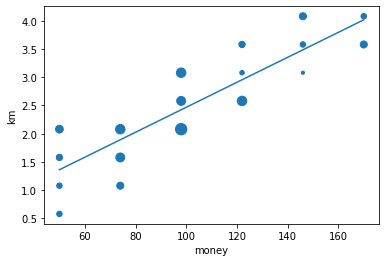

In [10]:
# plotting
import matplotlib.pyplot as plt
x = []
y = []
weight = []
for i in range(len(table)):
    for j in range(len(table[i])):
        x.append(X[i])
        y.append(Y[j])
        weight.append(table[i][j]*10)
plt.scatter(x, y, weight)
plt.plot([min(X), max(X)], [f(min(X)), f(max(X))])
plt.xlabel("money")
plt.ylabel("km")
plt.show()
